In [6]:
import matplotlib.pyplot as plt
import networkx as nx
import random
import numpy as np

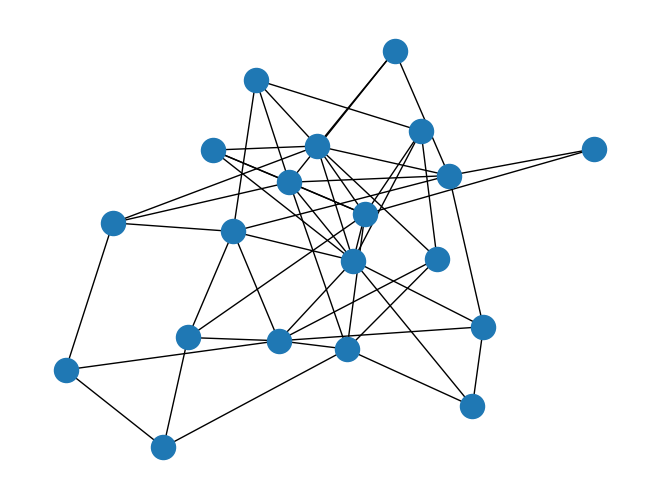

In [123]:
G = nx.gnm_random_graph(n=20, m = 50)

pos = nx.spring_layout(G)
nx.draw(G, pos)
plt.show()

In [122]:
state = []
nodes = G.nodes
for node in nodes:
    state.append((node, "S"))
print(state)
randint = np.random.randint(len(nodes))
state[randint] = (randint, "I")
print(state)
state_dict = dict(state)
print(state_dict)


[(0, 'S'), (1, 'S'), (2, 'S'), (3, 'S'), (4, 'S'), (5, 'S'), (6, 'S'), (7, 'S'), (8, 'S'), (9, 'S'), (10, 'S'), (11, 'S'), (12, 'S'), (13, 'S'), (14, 'S'), (15, 'S'), (16, 'S'), (17, 'S'), (18, 'S'), (19, 'S')]
[(0, 'S'), (1, 'S'), (2, 'S'), (3, 'S'), (4, 'S'), (5, 'S'), (6, 'S'), (7, 'S'), (8, 'S'), (9, 'S'), (10, 'S'), (11, 'S'), (12, 'S'), (13, 'S'), (14, 'S'), (15, 'I'), (16, 'S'), (17, 'S'), (18, 'S'), (19, 'S')]
{0: 'S', 1: 'S', 2: 'S', 3: 'S', 4: 'S', 5: 'S', 6: 'S', 7: 'S', 8: 'S', 9: 'S', 10: 'S', 11: 'S', 12: 'S', 13: 'S', 14: 'S', 15: 'I', 16: 'S', 17: 'S', 18: 'S', 19: 'S'}


In [110]:
nx.set_node_attributes(G, state, "state")

[0, 1, 2, 5, 7, 8, 10, 11, 12, 15, 16, 17, 18]
[3, 4, 6, 9, 13, 14, 19]


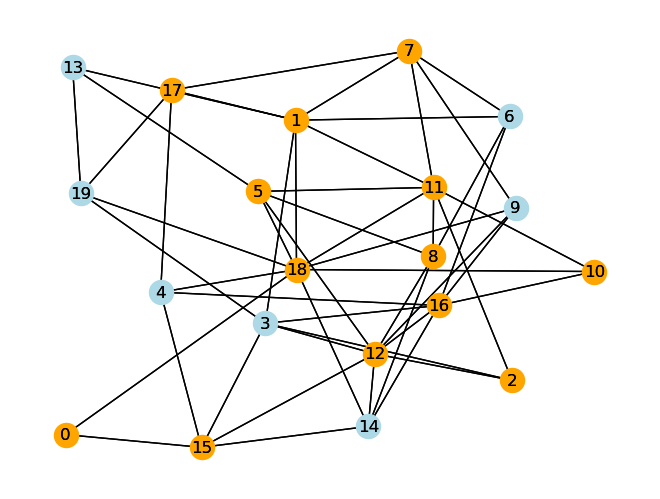

In [121]:
infected_nodes = []
susceptible_nodes = []
for key, label in state_dict.items():
    if label == "I":
        infected_nodes.append(key)
    else:
        susceptible_nodes.append(key)

print(infected_nodes)
print(susceptible_nodes)

pos = nx.spring_layout(G)
nx.draw(G, pos = pos, nodelist = infected_nodes, node_color = "orange", with_labels=True)
nx.draw(G, pos = pos, nodelist=susceptible_nodes, node_color = "lightblue", with_labels=True)
plt.show()


Network Dynamics

In [120]:
#get previous state

state = nx.get_node_attributes(G, "state")
beta = 0.3 #probability of being infected by every neightbor that it has
gamma = 0.2 #probability of recovery

new_state = {}
for node in G.nodes():
    #print(node)
    if state_dict[node] == "I":
        if random.uniform(0, 1) < gamma:
            new_state[node] = "S"
    else:
        #checking the neighbors
        neighbors = list(G.neighbors(node))
        for neighbor in neighbors:
            if state_dict[neighbor] == "I":
                if random.uniform(0, 1) < beta:
                    new_state[node] = "I"
                    break

print(new_state)
state_dict.update(new_state)
print(state_dict)

{0: 'I', 2: 'I', 3: 'S', 4: 'S', 6: 'S', 9: 'S', 14: 'S', 16: 'I', 19: 'S'}
{0: 'I', 1: 'I', 2: 'I', 3: 'S', 4: 'S', 5: 'I', 6: 'S', 7: 'I', 8: 'I', 9: 'S', 10: 'I', 11: 'I', 12: 'I', 13: 'S', 14: 'S', 15: 'I', 16: 'I', 17: 'I', 18: 'I', 19: 'S'}


[10, 16, 18]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 17, 19]


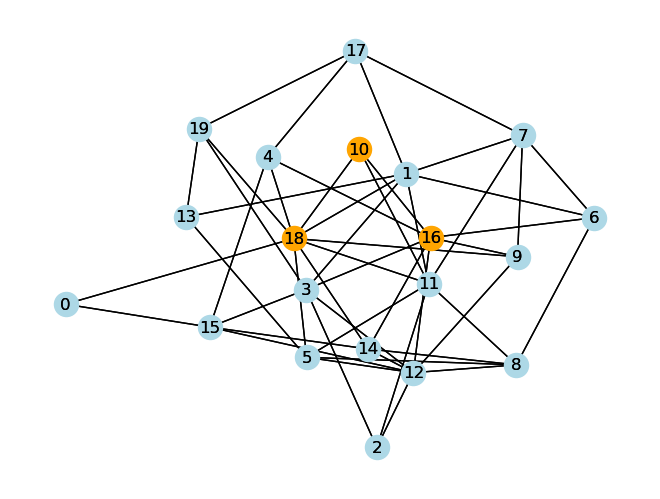

In [113]:
infected_nodes = []
susceptible_nodes = []
for key, label in state_dict.items():
    if label == "I":
        infected_nodes.append(key)
    else:
        susceptible_nodes.append(key)

print(infected_nodes)
print(susceptible_nodes)

pos = nx.spring_layout(G)
nx.draw(G, pos = pos, nodelist = infected_nodes, node_color = "orange", with_labels=True)
nx.draw(G, pos = pos, nodelist=susceptible_nodes, node_color = "lightblue", with_labels=True)
plt.show()


Whole code:

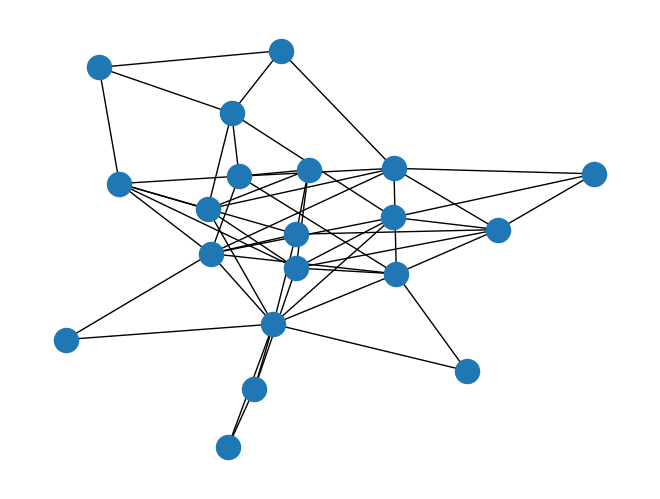

[(0, 'S'), (1, 'S'), (2, 'S'), (3, 'S'), (4, 'S'), (5, 'S'), (6, 'S'), (7, 'S'), (8, 'S'), (9, 'S'), (10, 'S'), (11, 'S'), (12, 'S'), (13, 'S'), (14, 'S'), (15, 'S'), (16, 'S'), (17, 'S'), (18, 'S'), (19, 'S')]
[(0, 'S'), (1, 'S'), (2, 'I'), (3, 'S'), (4, 'S'), (5, 'S'), (6, 'S'), (7, 'S'), (8, 'S'), (9, 'S'), (10, 'S'), (11, 'S'), (12, 'S'), (13, 'S'), (14, 'S'), (15, 'S'), (16, 'S'), (17, 'S'), (18, 'S'), (19, 'S')]
{0: 'S', 1: 'S', 2: 'I', 3: 'S', 4: 'S', 5: 'S', 6: 'S', 7: 'S', 8: 'S', 9: 'S', 10: 'S', 11: 'S', 12: 'S', 13: 'S', 14: 'S', 15: 'S', 16: 'S', 17: 'S', 18: 'S', 19: 'S'}
[2]
[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


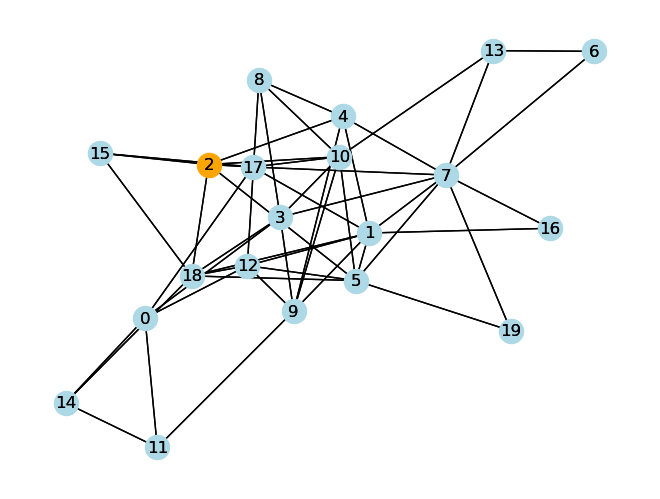

In [159]:
G = nx.gnm_random_graph(n=20, m = 50)

pos = nx.spring_layout(G)
nx.draw(G, pos)
plt.show()
plt.close()

state = []
nodes = G.nodes
for node in nodes:
    state.append((node, "S"))
print(state)
randint = np.random.randint(len(nodes))
state[randint] = (randint, "I")
print(state)
state_dict = dict(state)
print(state_dict)

nx.set_node_attributes(G, state, "state")


infected_nodes = []
susceptible_nodes = []
for key, label in state_dict.items():
    if label == "I":
        infected_nodes.append(key)
    else:
        susceptible_nodes.append(key)

print(infected_nodes)
print(susceptible_nodes)

pos = nx.spring_layout(G)
nx.draw(G, pos = pos, nodelist = infected_nodes, node_color = "orange", with_labels=True)
nx.draw(G, pos = pos, nodelist=susceptible_nodes, node_color = "lightblue", with_labels=True)
plt.show()


[1, 3, 5, 6, 8, 9, 10, 15, 17, 18, 19]
[0, 2, 4, 7, 11, 12, 13, 14, 16]


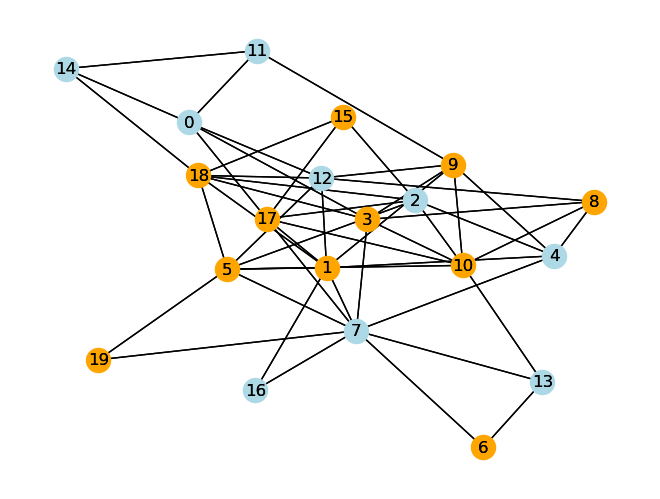

In [160]:
iterations = 100
dictionaries_list = []

beta = 0.5 #probability of being infected by every neightbor that it has
gamma = 0.4 #probability of recovery

#whole update rules
for iters in range(iterations):
    state = nx.get_node_attributes(G, "state")
    new_state = {}
    for node in G.nodes():
        #print(node)
        if state_dict[node] == "I":
            if random.uniform(0, 1) < gamma:
                new_state[node] = "S"
        else:
            #checking the neighbors
            neighbors = list(G.neighbors(node))
            for neighbor in neighbors:
                if state_dict[neighbor] == "I":
                    if random.uniform(0, 1) < beta:
                        new_state[node] = "I"
                        break
    state_dict.update(new_state)
    dictionaries_list.append(state_dict.copy())


infected_nodes = []
susceptible_nodes = []
for key, label in state_dict.items():
    if label == "I":
        infected_nodes.append(key)
    else:
        susceptible_nodes.append(key)

print(infected_nodes)
print(susceptible_nodes)

pos = nx.spring_layout(G)
nx.draw(G, pos = pos, nodelist = infected_nodes, node_color = "orange", with_labels=True)
nx.draw(G, pos = pos, nodelist=susceptible_nodes, node_color = "lightblue", with_labels=True)
plt.show()
    

In [161]:
#we can plot the infected versus recovered people
infected_ppl = []
susceptible_ppl = []
for d in dictionaries_list:
    inf = 0
    sus = 0
    for key, value in d.items():
        if value == "S":
            sus = sus + 1
        else:
            inf = inf + 1
    infected_ppl.append(inf)
    susceptible_ppl.append(sus)

print(infected_ppl) #these are lists of the number of infected vs number of susceptible per iteration
print(susceptible_ppl)

[3, 10, 12, 12, 15, 12, 15, 12, 14, 16, 15, 14, 13, 12, 16, 15, 14, 11, 10, 15, 13, 10, 14, 18, 18, 12, 16, 11, 11, 14, 17, 13, 10, 14, 12, 14, 15, 12, 12, 15, 13, 14, 13, 15, 16, 17, 13, 16, 14, 13, 14, 16, 14, 14, 14, 13, 15, 14, 10, 16, 14, 11, 11, 13, 14, 14, 11, 8, 16, 11, 17, 15, 10, 11, 13, 12, 13, 16, 15, 12, 14, 11, 12, 14, 13, 13, 14, 13, 15, 14, 15, 9, 16, 13, 12, 11, 17, 13, 14, 11]
[17, 10, 8, 8, 5, 8, 5, 8, 6, 4, 5, 6, 7, 8, 4, 5, 6, 9, 10, 5, 7, 10, 6, 2, 2, 8, 4, 9, 9, 6, 3, 7, 10, 6, 8, 6, 5, 8, 8, 5, 7, 6, 7, 5, 4, 3, 7, 4, 6, 7, 6, 4, 6, 6, 6, 7, 5, 6, 10, 4, 6, 9, 9, 7, 6, 6, 9, 12, 4, 9, 3, 5, 10, 9, 7, 8, 7, 4, 5, 8, 6, 9, 8, 6, 7, 7, 6, 7, 5, 6, 5, 11, 4, 7, 8, 9, 3, 7, 6, 9]


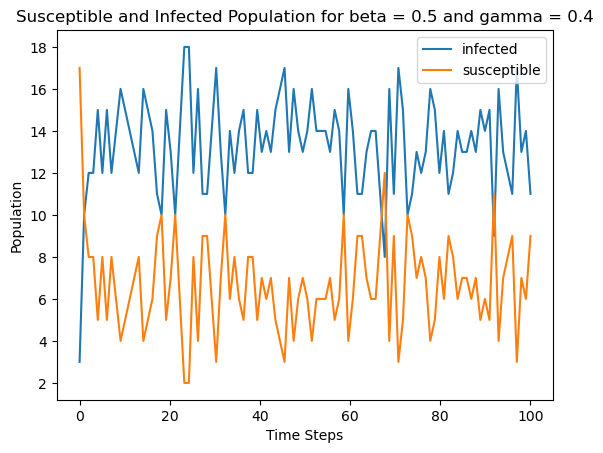

In [164]:
time_arr = np.linspace(0, iterations, iterations)
plt.plot(time_arr, np.array(infected_ppl), label = "infected")
plt.plot(time_arr, np.array(susceptible_ppl), label = "susceptible")
plt.xlabel("Time Steps")
plt.ylabel("Population")
plt.title(f"Susceptible and Infected Population for beta = {beta} and gamma = {gamma}")
plt.legend()
plt.show()